<a href="https://colab.research.google.com/github/sadikinisaac/stockmarket/blob/master/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program predicts the price of GOOG stock for a specific day
#              using the Machine Learning algorithm called Support Vector Regression (SVR)
#              & Linear Regression.

In [0]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GOOG_30_days.csv to GOOG_30_days.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['GOOG_30_days.csv']))

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400


In [0]:
#Create the lists / X and Y data sets
dates = []
prices = []

In [6]:
#Get the number of rows and columns in the data set
df.shape

(20, 7)

In [7]:
#Get the last row of data (this will be the data that we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2019-06-28,1076.390015,1081.0,1073.369995,1080.910034,1080.910034,1693200


In [8]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400
5,2019-06-10,1072.979980,1092.660034,1072.322021,1080.380005,1080.380005,1464200
6,2019-06-11,1093.979980,1101.989990,1077.603027,1078.719971,1078.719971,1436700
7,2019-06-12,1078.000000,1080.930054,1067.540039,1077.030029,1077.030029,1061000
8,2019-06-13,1083.640015,1094.170044,1080.150024,1088.770020,1088.770020,1057700
9,2019-06-14,1086.420044,1092.689941,1080.171997,1085.349976,1085.349976,1111500


In [9]:
#The new shape of the data
df.shape

(19, 7)

In [0]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [12]:
#See what days were recorded
print(dates)

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]


In [0]:
def predict_prices(dates, prices, x):
  
  #Create the 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Create the Linear Regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

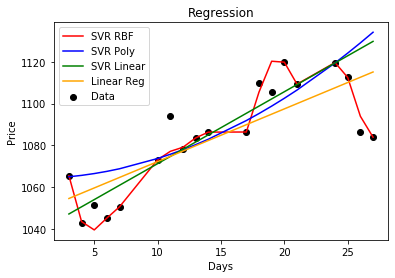

(1091.7058004910944, 1133.3133133337788, 1139.5478482146918, 1117.7087934280248)


In [14]:
#Predict the price of GOOG on day 28
predicted_price = predict_prices(dates, prices, [[28]])
print(predicted_price)